In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [122]:
np.random.seed(seed=11)

In [123]:
# fileUrl = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/titanic.csv" # 404
filePath = "../data/titanic/train.csv"
df = pd.read_csv(filePath, header=0) # header = 0th row

In [124]:
# Data info
df.head(5)
df.tail(5)
df.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.15,NaN,S
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.90,NaN,S


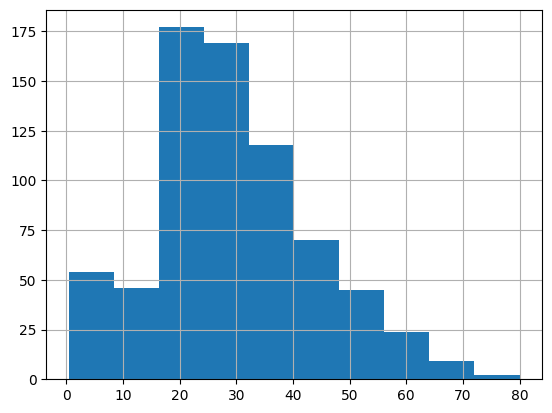

In [125]:
# Per col
df["Age"].hist()

df["Age"].unique()

df["Age"].head()

df["Age"].mean()

df[df["Age"]==10].head() # Double filter

In [126]:
# Filtering
df.sort_values("Age", ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [127]:
# index
df.iloc[0, :]

df.iloc[0, 3]

'Braund, Mr. Owen Harris'

In [128]:
# Clean data

# Remove all nans, fix indexes
df = df.dropna() 
df = df.reset_index()

# Removing all text cols, map some text cols to nums
df = df.drop(["Name", "Cabin", "Ticket"], axis=1)
df["Sex"] = df["Sex"].map({"female": 0, "male": 1}).astype(int)
df["Embarked"] = df["Embarked"].dropna().map({"S": 0, "Q": 1, "C": 2}).astype(int)

df.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,2,1,1,0,38.0,1,0,71.2833,2
1,3,4,1,1,0,35.0,1,0,53.1000,0
2,6,7,0,1,1,54.0,0,0,51.8625,0
3,10,11,1,3,0,4.0,1,1,16.7000,0
4,11,12,1,1,0,58.0,0,0,26.5500,0


In [129]:
df.groupby("Survived").mean()

,index,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,,,
0,401.983333,402.983333,1.216667,0.900000,41.350000,0.366667,0.450000,64.048262,0.583333
1,479.918699,480.918699,1.178862,0.333333,32.905854,0.512195,0.487805,85.821107,0.788618


In [130]:
# Make col for family size
def get_family_size(sibSp, parch):
    family_size = sibSp + parch
    return family_size

col = df[["SibSp", "Parch"]].apply(lambda x: get_family_size(x["SibSp"], x["Parch"]), axis=1)
df.insert(5, "FamilySize", col)
df.head()

,index,PassengerId,Survived,Pclass,Sex,FamilySize,Age,SibSp,Parch,Fare,Embarked
0,1,2,1,1,0,1,38.0,1,0,71.2833,2
1,3,4,1,1,0,1,35.0,1,0,53.1000,0
2,6,7,0,1,1,0,54.0,0,0,51.8625,0
3,10,11,1,3,0,2,4.0,1,1,16.7000,0
4,11,12,1,1,0,0,58.0,0,0,26.5500,0


In [131]:
# Save new dataset
df.to_csv("../data/titanic/preproc_train.csv", index=False)